In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Load the data
df = pd.read_csv('basicdata.csv')
df

,Date,Close_gold,Close_sp500,Close_vix,Close_eur_usd,Close_oil,CFSI
0,2004-11-18,44.380001,1183.550049,12.980000,1.294901,46.220001,-0.32
1,2004-11-19,44.779999,1170.339966,13.500000,1.303900,48.439999,-0.31
2,2004-11-22,44.950001,1177.239990,12.970000,1.304002,48.639999,-0.31
3,2004-11-23,44.750000,1176.939941,12.670000,1.309706,48.939999,-0.31
4,2004-11-24,45.049999,1181.760010,12.720000,1.317801,49.439999,-0.31
...,...,...,...,...,...,...,...
2461,2014-10-13,118.519997,1874.739990,24.639999,1.263983,85.739998,-0.33
2462,2014-10-14,118.589996,1877.699951,22.790001,1.272394,81.839996,-0.23
2463,2014-10-15,118.989998,1862.489990,25.270000,1.263903,81.779999,-0.14
2464,2014-10-16,119.220001,1862.760010,25.200001,1.282166,82.699997,-0.04


In [42]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the percent changes and boolean direction for each series
for column in ['Close_gold', 'Close_sp500', 'Close_vix', 'Close_eur_usd', 'Close_oil']:
    df[f'Pct_change_{column}'] = df[column].pct_change()
    df[f'Direction_{column}'] = df[column].diff().apply(lambda x: 1 if x > 0 else 0)

# Shift the gold direction to create the Target variable
df['Target'] = df['Direction_Close_gold'].shift(-1)
# Calculate the actual change in gold price for the next day and shift it to create the Target variable for actual change
df['Target_Change'] = df['Pct_change_Close_gold'].shift(-1)

# Display the updated dataframe with boolean directions and the new Target variable
df


,Date,Close_gold,Close_sp500,Close_vix,Close_eur_usd,Close_oil,CFSI,Pct_change_Close_gold,Direction_Close_gold,Pct_change_Close_sp500,Direction_Close_sp500,Pct_change_Close_vix,Direction_Close_vix,Pct_change_Close_eur_usd,Direction_Close_eur_usd,Pct_change_Close_oil,Direction_Close_oil,Target,Target_Change
0,2004-11-18,44.380001,1183.550049,12.980000,1.294901,46.220001,-0.32,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,1.0,0.009013
1,2004-11-19,44.779999,1170.339966,13.500000,1.303900,48.439999,-0.31,0.009013,1,-0.011161,0,0.040062,1,0.006950,1,0.048031,1,1.0,0.003796
2,2004-11-22,44.950001,1177.239990,12.970000,1.304002,48.639999,-0.31,0.003796,1,0.005896,1,-0.039259,0,0.000078,1,0.004129,1,0.0,-0.004449
3,2004-11-23,44.750000,1176.939941,12.670000,1.309706,48.939999,-0.31,-0.004449,0,-0.000255,0,-0.023130,0,0.004374,1,0.006168,1,1.0,0.006704
4,2004-11-24,45.049999,1181.760010,12.720000,1.317801,49.439999,-0.31,0.006704,1,0.004095,1,0.003946,1,0.006180,1,0.010217,1,1.0,0.007769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2014-10-13,118.519997,1874.739990,24.639999,1.263983,85.739998,-0.33,0.007909,1,-0.016468,0,0.160075,1,-0.003880,0,-0.000932,0,1.0,0.000591
2462,2014-10-14,118.589996,1877.699951,22.790001,1.272394,81.839996,-0.23,0.000591,1,0.001579,1,-0.075081,0,0.006654,1,-0.045486,0,1.0,0.003373
2463,2014-10-15,118.989998,1862.489990,25.270000,1.263903,81.779999,-0.14,0.003373,1,-0.008100,0,0.108820,1,-0.006673,0,-0.000733,0,1.0,0.001933
2464,2014-10-16,119.220001,1862.760010,25.200001,1.282166,82.699997,-0.04,0.001933,1,0.000145,1,-0.002770,0,0.014450,1,0.011250,1,0.0,-0.001929


In [43]:
# drop na rows
df = df.dropna()
df

,Date,Close_gold,Close_sp500,Close_vix,Close_eur_usd,Close_oil,CFSI,Pct_change_Close_gold,Direction_Close_gold,Pct_change_Close_sp500,Direction_Close_sp500,Pct_change_Close_vix,Direction_Close_vix,Pct_change_Close_eur_usd,Direction_Close_eur_usd,Pct_change_Close_oil,Direction_Close_oil,Target,Target_Change
1,2004-11-19,44.779999,1170.339966,13.500000,1.303900,48.439999,-0.31,0.009013,1,-0.011161,0,0.040062,1,0.006950,1,0.048031,1,1.0,0.003796
2,2004-11-22,44.950001,1177.239990,12.970000,1.304002,48.639999,-0.31,0.003796,1,0.005896,1,-0.039259,0,0.000078,1,0.004129,1,0.0,-0.004449
3,2004-11-23,44.750000,1176.939941,12.670000,1.309706,48.939999,-0.31,-0.004449,0,-0.000255,0,-0.023130,0,0.004374,1,0.006168,1,1.0,0.006704
4,2004-11-24,45.049999,1181.760010,12.720000,1.317801,49.439999,-0.31,0.006704,1,0.004095,1,0.003946,1,0.006180,1,0.010217,1,1.0,0.007769
5,2004-11-29,45.400002,1178.569946,13.300000,1.326506,49.759998,-0.25,0.007769,1,-0.002699,0,0.045597,1,0.006606,1,0.006472,1,0.0,-0.006167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,2014-10-10,117.589996,1906.130005,21.240000,1.268907,85.820000,-0.41,-0.000425,0,-0.011451,0,0.132196,1,-0.004238,0,0.000583,1,1.0,0.007909
2461,2014-10-13,118.519997,1874.739990,24.639999,1.263983,85.739998,-0.33,0.007909,1,-0.016468,0,0.160075,1,-0.003880,0,-0.000932,0,1.0,0.000591
2462,2014-10-14,118.589996,1877.699951,22.790001,1.272394,81.839996,-0.23,0.000591,1,0.001579,1,-0.075081,0,0.006654,1,-0.045486,0,1.0,0.003373
2463,2014-10-15,118.989998,1862.489990,25.270000,1.263903,81.779999,-0.14,0.003373,1,-0.008100,0,0.108820,1,-0.006673,0,-0.000733,0,1.0,0.001933


In [44]:
df.to_csv("fulldata.csv", index=False)

In [59]:
# count the number of 1s and 0s in the target
df['Target'].value_counts()

Target
1.0    1316
0.0    1148
Name: count, dtype: int64

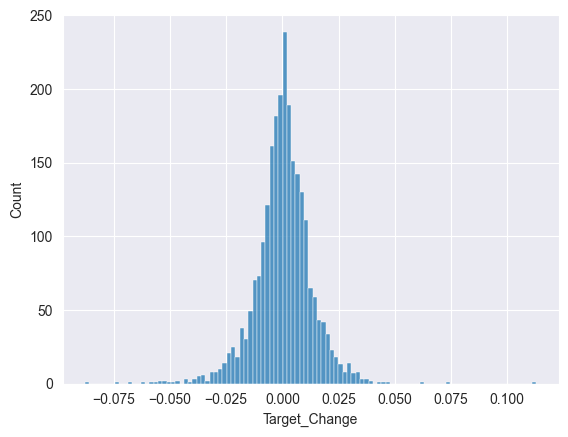

In [57]:
# plot target change
sns.histplot(df['Target_Change'])
plt.show()

In [46]:
# define 4 phases of data:
# 1. start - 30 november 2007 (before)
# 2. 3 december 2007 - 30 june 2009 (during)
# 3. 1 july 2009 - 28 march 2013 (after)
# 4. 2 april 2013 - 20 october 2014 (post)

before = df[df['Date'] <= '2007-11-30']
during = df[(df['Date'] >= '2007-12-03') & (df['Date'] <= '2009-06-30')]
after = df[(df['Date'] >= '2009-07-01') & (df['Date'] <= '2013-03-28')]
post = df[(df['Date'] >= '2013-04-02') & (df['Date'] <= '2014-10-20')]

all_phases = {'before': before, 'during': during, 'after': after, 'post': post}

In [47]:
# save the data
# before.to_csv("before.csv", index=False)
# during.to_csv("during.csv", index=False)
# after.to_csv("after.csv", index=False)
# post.to_csv("post.csv", index=False)


In [53]:
# fit a decision tree model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# X all columns except 'Date', 'Target'
# train a tree for every phase
for phase, data in all_phases.items():
    X = data.drop(columns=['Date', 'Target', 'Target_Change'])
    y_c = data['Target']
    y_r = data['Target_Change']
    classifier = DecisionTreeClassifier()
    classifier.fit(X, y_c)
    regressor = DecisionTreeRegressor()
    regressor.fit(X, y_r)
    # get accuracy
    accuracy_c = classifier.score(X, y_c)
    accuracy_r = regressor.score(X, y_r)
    print(f'{phase} accuracy: {accuracy_c} {accuracy_r}')
    



before accuracy: 1.0 1.0
during accuracy: 1.0 1.0
after accuracy: 1.0 1.0
post accuracy: 1.0 1.0


In [54]:
# now the same but with train test split
from sklearn.model_selection import train_test_split

for phase, data in all_phases.items():
    X = data.drop(columns=['Date', 'Target', 'Target_Change'])
    y_c = data['Target']
    y_r = data['Target_Change']
    X_train, X_test, y_train_c, y_test_c, y_train_r, y_test_r = train_test_split(X, y_c, y_r, test_size=0.2)
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train_c)
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train_r)
    # get accuracy
    accuracy_c = classifier.score(X_test, y_test_c)
    accuracy_r = regressor.score(X_test, y_test_r)
    print(f'{phase} accuracy: {accuracy_c} {accuracy_r}')

before accuracy: 0.5364238410596026 -0.6373914269986516
during accuracy: 0.5789473684210527 -0.8311577171656153
after accuracy: 0.4603174603174603 -1.6991122763008253
post accuracy: 0.6025641025641025 -0.5551318865786081
